# 참고 사이트

[kaggle-MNIST](https://www.kaggle.com/vincentlefoulon/pytorch-mnist)

In [1]:
from __future__ import print_function

In [2]:
import pandas as pd
import numpy
import tensorflow

/Users/teddylee/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import sys
sys.executable

'/Users/teddylee/miniconda3/bin/python'

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# PyTorch Basic Functions and Usages

## Basic

In [5]:
# construct uninitialize tensor
x = torch.empty(3, 5)
x

tensor([[ 0.0000e+00,  1.0842e-19, -2.0566e+10,  8.5920e+09,  7.0065e-45],
        [ 0.0000e+00,  3.5285e-33,  4.5779e-41,  3.5285e-33,  4.5779e-41],
        [ 3.5522e-33,  4.5559e-41,  3.5522e-33,  4.5779e-41,  3.5522e-33]])

In [6]:
# check tensor size
x.size()

torch.Size([3, 5])

In [7]:
# generate random tensors
y = torch.randn(3, 5)
y

tensor([[ 1.4295,  0.9393,  1.2178,  0.6311, -1.8682],
        [ 0.4992, -0.6476,  1.1434, -0.6581,  0.0639],
        [-0.2660, -0.1764, -0.4660,  1.2395, -0.0004]])

In [8]:
# zeros and ones
print(torch.zeros(3, 5))
print(torch.ones(3, 5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


## Broadcast Calculation

In [9]:
# add
torch.add(x, y)

tensor([[ 1.4295e+00,  9.3930e-01, -2.0566e+10,  8.5920e+09, -1.8682e+00],
        [ 4.9920e-01, -6.4764e-01,  1.1434e+00, -6.5813e-01,  6.3866e-02],
        [-2.6595e-01, -1.7638e-01, -4.6601e-01,  1.2395e+00, -4.0541e-04]])

In [10]:
# in-place addition
x = torch.zeros(3, 5)
x.add_(y)
x

tensor([[ 1.4295,  0.9393,  1.2178,  0.6311, -1.8682],
        [ 0.4992, -0.6476,  1.1434, -0.6581,  0.0639],
        [-0.2660, -0.1764, -0.4660,  1.2395, -0.0004]])

In [11]:
# subtract
torch.sub(x, y)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [12]:
# multiply
torch.mul(x, y)

tensor([[2.0436e+00, 8.8229e-01, 1.4831e+00, 3.9826e-01, 3.4902e+00],
        [2.4920e-01, 4.1944e-01, 1.3073e+00, 4.3313e-01, 4.0788e-03],
        [7.0731e-02, 3.1111e-02, 2.1717e-01, 1.5363e+00, 1.6436e-07]])

In [13]:
# division
torch.div(x, y)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [14]:
# out parameter
zero = torch.zeros(3, 5)
one = torch.ones(3, 5)
result = torch.empty(3, 5)
torch.add(zero, one, out=result)
result

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## Resizing

In [15]:
# use torch.view
x = torch.ones(3, 5)
print(x.size())
x = x.view(5, 3)
print(x.size())

torch.Size([3, 5])
torch.Size([5, 3])


## Interact with Numpy

In [16]:
import numpy as np

In [17]:
np_array = np.random.randn(3, 3)
np_array.shape, type(np_array)

((3, 3), numpy.ndarray)

In [18]:
# torch.from_numpy()
torch_array = torch.from_numpy(np_array)
torch_array.size(), type(torch_array)

(torch.Size([3, 3]), torch.Tensor)

In [19]:
# torch.numpy()
to_numpy_array = torch_array.numpy()
to_numpy_array.shape, type(to_numpy_array)

((3, 3), numpy.ndarray)

# Data Handling

## MNIST Dataset

### torchvision.datasets.MNIST
torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)

In [20]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [21]:
len(mnist_trainset)

60000

In [22]:
type(mnist_trainset)

torchvision.datasets.mnist.MNIST

In [23]:
BATCH_SIZE = 64

In [24]:
# torchvision.datasets.MNIST outputs a set of PIL images
# We transform them to tensors
MNIST_transform = transforms.Compose([
    transforms.ToTensor(), # first, convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
])

# Load and transform data
trainset = datasets.MNIST('/tmp', train=True, download=True, transform=MNIST_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = datasets.MNIST('/tmp', train=False, download=True, transform=MNIST_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [25]:
# Image(features), Label(labels) loading through iteration
img, lbl = next(iter(trainloader))

In [26]:
img.size(), lbl.size()

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision

def visualize(image):
    im = torchvision.utils.make_grid(image)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


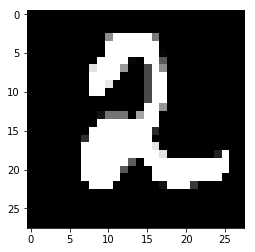

In [28]:
visualize(img[1])

# Neural Network

## Hyperparameters

In [41]:
# hyperparameters here
input_size = 28*28
hidden_1_size = 128
hidden_2_size = 64
output_size = 10
learning_rate = 0.01
training_epoch = 3

## Build Network (Model Sequence)

In [42]:
from collections import OrderedDict
model_sequence = OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_1_size)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_1_size, hidden_2_size)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_2_size, output_size)),
    ('softmax', nn.Softmax(dim=1))
])

In [43]:
model = nn.Sequential(model_sequence)

In [44]:
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

## Optimizer and Cost Functions

In [45]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [46]:
loss_function = nn.CrossEntropyLoss()

In [47]:
print_every = 50

for epoch in range(training_epoch):
    cnt = 0
    running_loss = 0
    for image, label in iter(trainloader):
        cnt += 1
        # resize images to 784 from (28, 28) - flatten
        image.resize_(image.size()[0], 28*28)
        
        # zero to all gradients
        optimizer.zero_grad()
        
        # train inputs
        output = model(image)

        # calculate losses
        loss = loss_function(output, label)
        loss.backward()
        
        # apply gradient descent
        optimizer.step()
        
        running_loss += loss.item()
        
        if cnt % print_every == 0:
            print("epoch: {}, loss: {}".format(epoch, running_loss / print_every))
            running_loss = 0

epoch: 0, loss: 2.2956738233566285
epoch: 0, loss: 2.2634285259246827
epoch: 0, loss: 2.126222529411316
epoch: 0, loss: 1.9458885240554809
epoch: 0, loss: 1.8158244919776916
epoch: 0, loss: 1.7266433215141297
epoch: 0, loss: 1.6785507035255431
epoch: 0, loss: 1.6476908349990844
epoch: 0, loss: 1.6150638198852538
epoch: 0, loss: 1.595977761745453
epoch: 0, loss: 1.5894164228439331
epoch: 0, loss: 1.5833081746101378
epoch: 0, loss: 1.5858566403388976
epoch: 0, loss: 1.5770608925819396
epoch: 0, loss: 1.5750331377983093
epoch: 0, loss: 1.5662693929672242
epoch: 0, loss: 1.5574766206741333
epoch: 0, loss: 1.5587181234359742
epoch: 1, loss: 1.5572782039642334
epoch: 1, loss: 1.5531983757019043
epoch: 1, loss: 1.5566648745536804
epoch: 1, loss: 1.558462052345276
epoch: 1, loss: 1.550595724582672
epoch: 1, loss: 1.5468142676353454
epoch: 1, loss: 1.548676724433899
epoch: 1, loss: 1.5500653338432313
epoch: 1, loss: 1.5432995986938476
epoch: 1, loss: 1.5403948664665221
epoch: 1, loss: 1.5389266

In [48]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images.resize_(images.size()[0], 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %
